In [1]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=13)

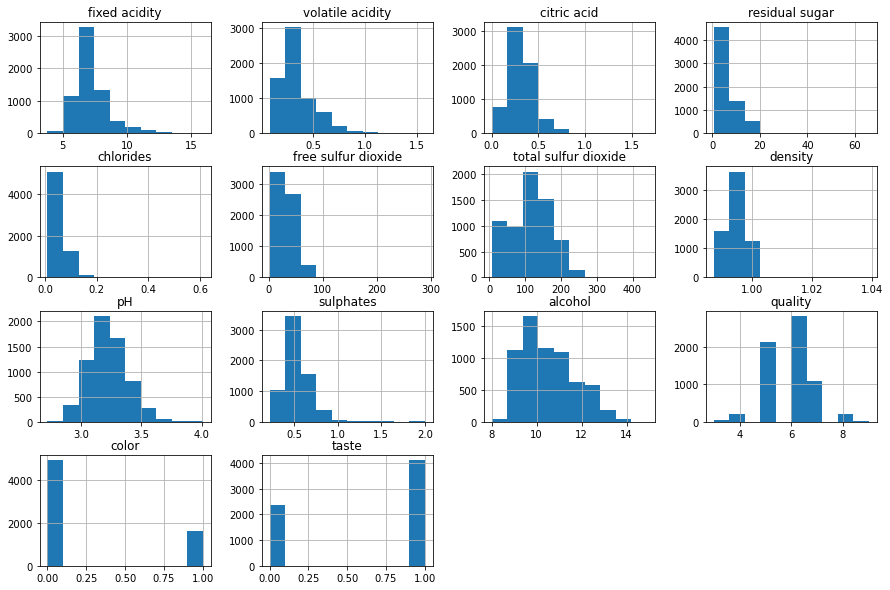

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

wine.hist(bins=10, figsize=(15, 10));

In [5]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'taste'],
      dtype='object')

In [6]:
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'taste']

df_pivot_table = wine.pivot_table(column_names, ['quality'], aggfunc="median")
df_pivot_table

,alcohol,chlorides,citric acid,color,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,taste,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,,
3,10.15,0.0550,0.33,0,0.995900,7.45,17.0,3.245,3.15,0.505,0.0,102.5,0.415
4,10.00,0.0505,0.26,0,0.994995,7.00,15.0,3.220,2.20,0.485,0.0,102.0,0.380
5,9.60,0.0530,0.30,0,0.996100,7.10,27.0,3.190,3.00,0.500,0.0,127.0,0.330
6,10.50,0.0460,0.31,0,0.994700,6.90,29.0,3.210,3.10,0.510,1.0,117.0,0.270
7,11.40,0.0390,0.32,0,0.992400,6.90,30.0,3.220,2.80,0.520,1.0,114.0,0.270
8,12.00,0.0370,0.32,0,0.991890,6.80,34.0,3.230,4.10,0.480,1.0,118.0,0.280
9,12.50,0.0310,0.36,0,0.990300,7.10,28.0,3.280,2.20,0.460,1.0,119.0,0.270


In [7]:
corr_matrix = wine.corr()

In [9]:
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
color                      0.486740          0.653036    -0.187397   
taste               

In [10]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
taste                   0.814484
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


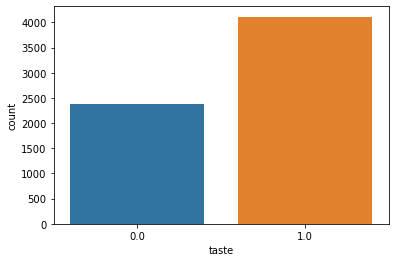

In [11]:
import seaborn as sns

sns.countplot(wine['taste']);

In [13]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [14]:
models = []
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

In [18]:
%time
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    print(name, cv_results.mean(), cv_results.std())

Wall time: 0 ns
AdaBoostClassifier 0.7533103205745169 0.02644765901536818
GradientBoostingClassifier 0.7663959428444511 0.021596556352125432
RandomForestClassifier 0.8208523358258681 0.01817156104729007
DecisionTreeClassifier 0.7554321833123565 0.01154909336756361
LogisticRegression 0.74273191678389 0.015548839626296565


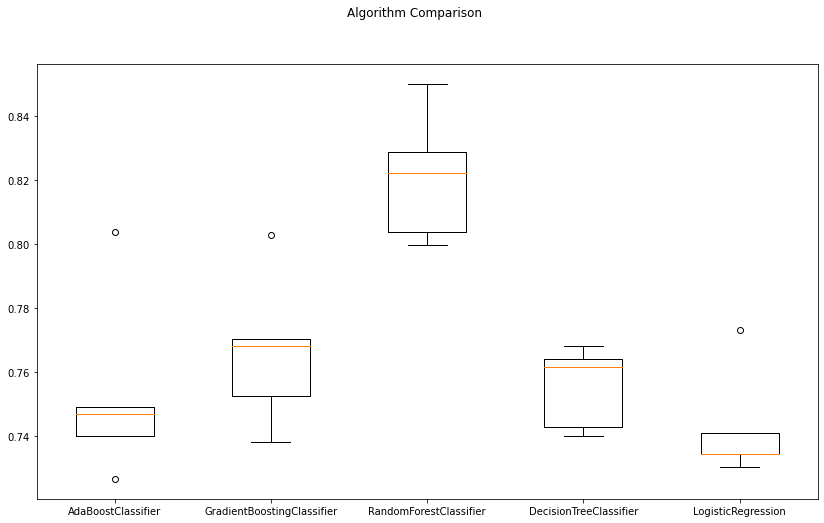

In [22]:
fig = plt.figure(figsize=(14, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, accuracy_score(y_test, pred))

AdaBoostClassifier 0.7553846153846154
GradientBoostingClassifier 0.7884615384615384
RandomForestClassifier 0.833076923076923
DecisionTreeClassifier 0.7746153846153846
LogisticRegression 0.7469230769230769
